# Import Required Libraries
Import the necessary libraries, including pandas.

In [1]:
# Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel File
Load the Excel file located at 'C:\Protocolo_Reposicionamiento_Probioticos\5_Integración con datos de patógenos y enfermedades\Consolidated\ST12_diseases_rare_dysbiosis_neurological.xlsx' using pandas.

In [2]:
# Load Excel File
file_path = r'C:\Protocolo_Reposicionamiento_Probioticos\5_Integración con datos de patógenos y enfermedades\Consolidated\ST12_diseases_rare_dysbiosis_neurological.xlsx'
data = pd.read_excel(file_path)  # Load the Excel file into a DataFrame

# Inspect Data
Inspect the first few rows of the loaded data using the head() function.

In [3]:
# Inspect Data
data.head()  # Display the first few rows of the DataFrame to inspect the data

,Gene,dysbiosis Disease,Rare Disease,Neurological Disease,Log2FoldChange
0,CCL4,"Obesity, Diabetes Mellitus","Anti-Basement Membrane Glomerulonephritis, Glo...",Epilepsy,5.236074
1,CSF2,"Inflammatory Bowel Diseases, Obesity, Diabetes...","Autoimmune Diseases, Acquired Immunodeficiency...","Alzheimer's Disease, Familial Alzheimer Diseas...",5.025177
2,CSF3,"Inflammatory Bowel Diseases, Obesity, Diabetes...","Autoimmune Diseases, Acquired Immunodeficiency...","Alzheimer's Disease, Amyotrophic Lateral Scler...",4.950078
3,CXCL8,"Infection caused by Helicobacter pylori, Respi...","Autoimmune Diseases, Glomerulonephritis, IGA G...","Alzheimer's Disease, Parkinson Disease, Bipola...",4.646226
4,CXCL10,"Respiratory Distress Syndrome, Inflammatory Bo...","Autoimmune Diseases, Glomerulonephritis, Acqui...",Amyotrophic Lateral Sclerosis,4.340264


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8681 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gene                  8681 non-null   object 
 1   dysbiosis Disease     8673 non-null   object 
 2   Rare Disease          8674 non-null   object 
 3   Neurological Disease  8620 non-null   object 
 4   Log2FoldChange        8681 non-null   float64
dtypes: float64(1), object(4)
memory usage: 406.9+ KB
None
   Gene dysbiosis Disease                                      Rare Disease  \
0  CCL4           Obesity         Anti-Basement Membrane Glomerulonephritis   
0  CCL4           Obesity                                Glomerulonephritis   
0  CCL4           Obesity                Acquired Immunodeficiency Syndrome   
0  CCL4           Obesity  Charcot-Marie-Tooth disease type 1D ORPHA:101084   
0  CCL4           Obesity   Charcot-Marie-Tooth disease type 4E ORPHA:99951   

  Neu

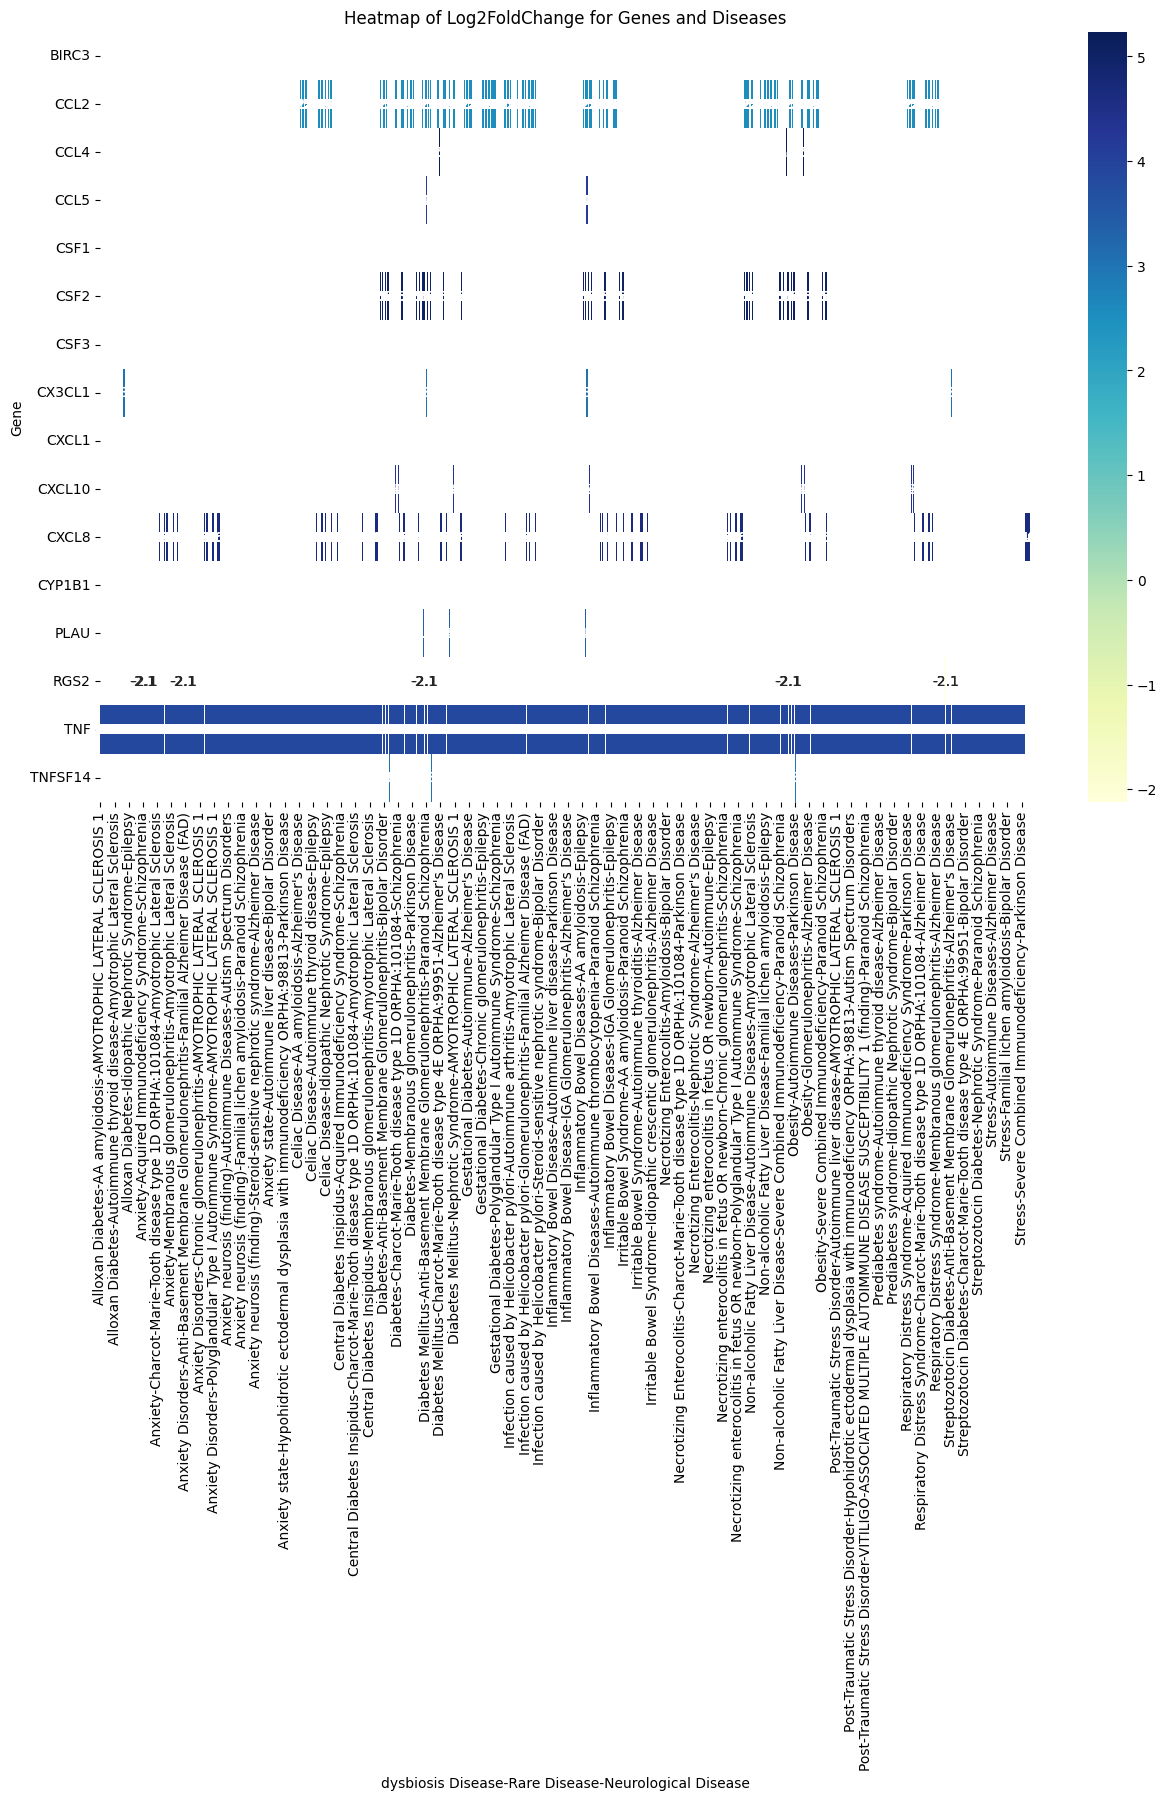

In [ ]:
# Correct data types if necessary
# Assuming 'Log2FoldChange' should be a float
data['Log2FoldChange'] = data['Log2FoldChange'].astype(float)

# Remove spaces after commas and split disease columns by comma
data['dysbiosis Disease'] = data['dysbiosis Disease'].str.replace(', ', ',').str.split(',')
data['Rare Disease'] = data['Rare Disease'].str.replace(', ', ',').str.split(',')
data['Neurological Disease'] = data['Neurological Disease'].str.replace(', ', ',').str.split(',')

# Explode the DataFrame
data = data.explode('dysbiosis Disease').explode('Rare Disease').explode('Neurological Disease')

# Verify data cleaning
print(data.info())
print(data.head())



In [39]:
data

,Gene,dysbiosis Disease,Rare Disease,Neurological Disease,Log2FoldChange
0,CCL4,Obesity,Anti-Basement Membrane Glomerulonephritis,Epilepsy,5.236074
0,CCL4,Obesity,Glomerulonephritis,Epilepsy,5.236074
0,CCL4,Obesity,Acquired Immunodeficiency Syndrome,Epilepsy,5.236074
0,CCL4,Obesity,Charcot-Marie-Tooth disease type 1D ORPHA:101084,Epilepsy,5.236074
0,CCL4,Obesity,Charcot-Marie-Tooth disease type 4E ORPHA:99951,Epilepsy,5.236074
...,...,...,...,...,...
27,CORO1A,NaN,NaN,Polyhydramnios-megalencephaly-symptomatic epil...,3.793873
28,KIFC2,NaN,Charcot-Marie-Tooth disease type 2P ORPHA:300319,Adult-onset dystonia-parkinsonism ORPHA:199351,2.144650
28,KIFC2,NaN,Charcot-Marie-Tooth disease type 4B3 ORPHA:363981,Adult-onset dystonia-parkinsonism ORPHA:199351,2.144650
29,KIF20A,NaN,Citrullinemia type II ORPHA:247585,NaN,-2.198054


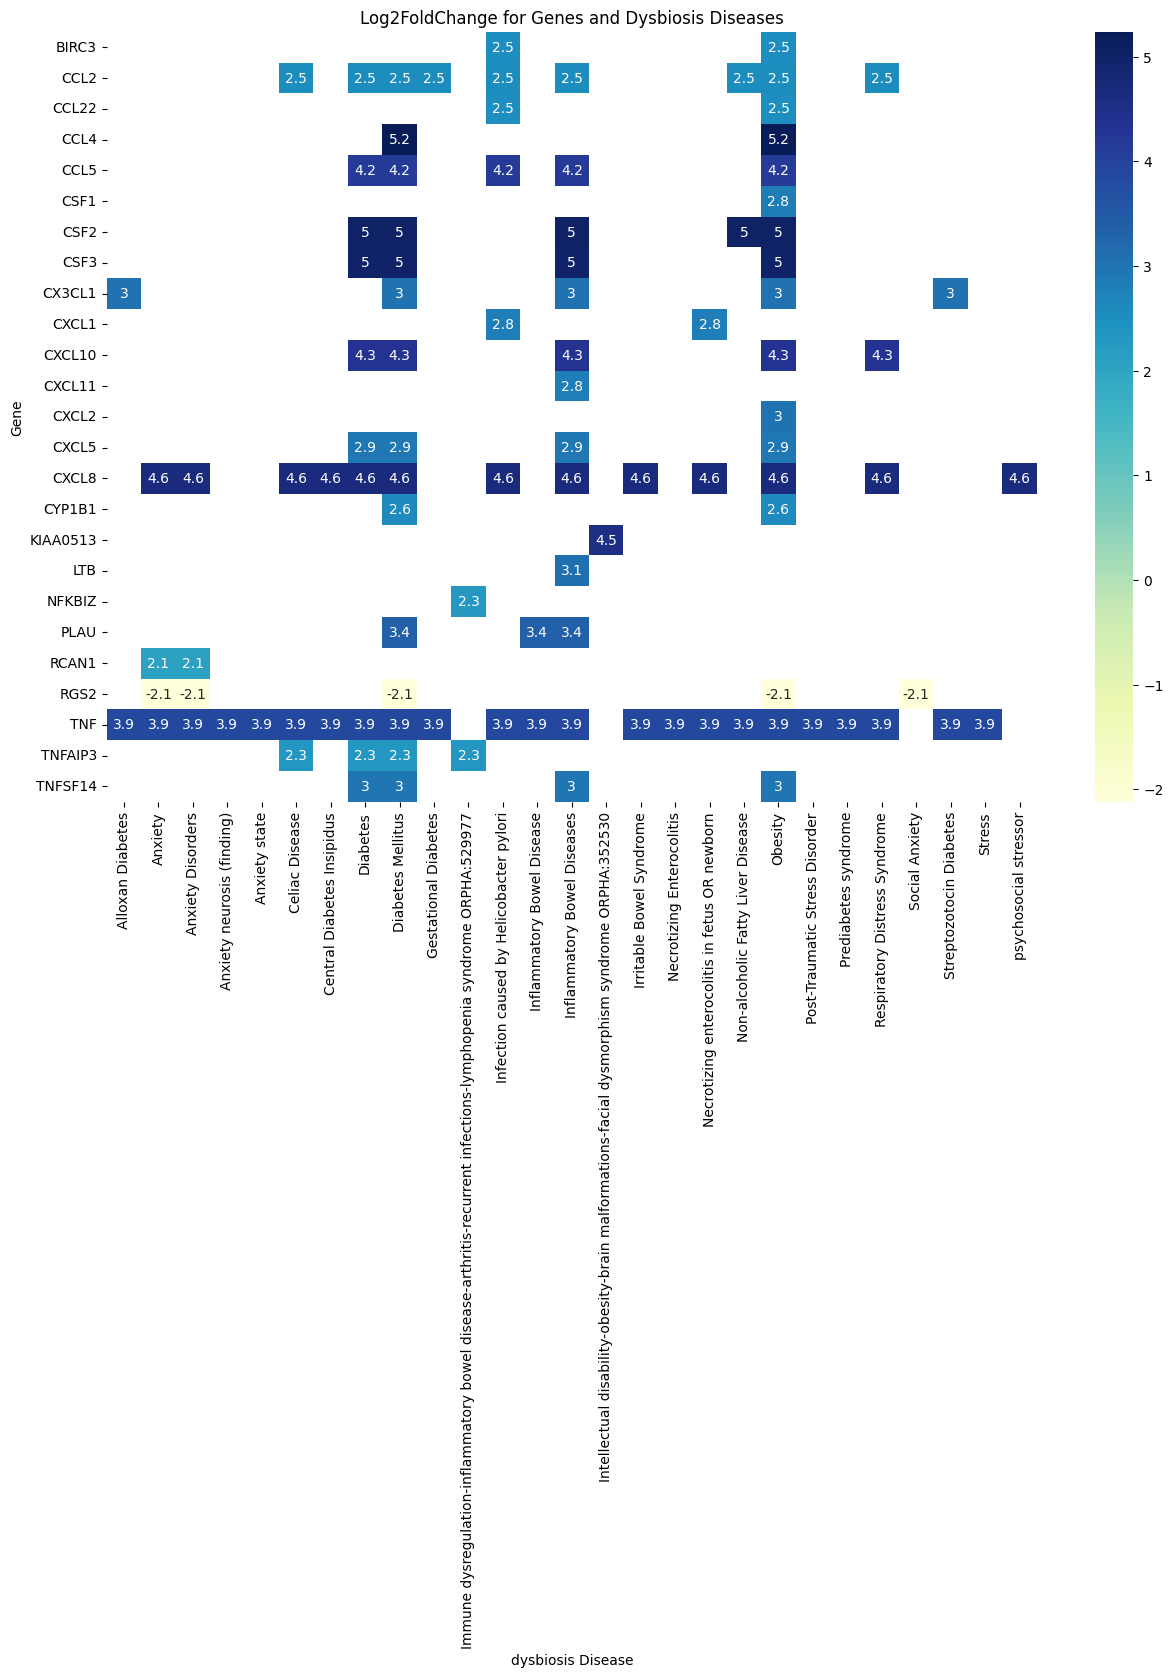

In [5]:
# Create Heatmap
# Pivot the dataframe to have genes as rows and diseases as columns
heatmap_data = data.pivot_table(index="Gene", columns="dysbiosis Disease", values="Log2FoldChange", aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title('Log2FoldChange for Genes and Dysbiosis Diseases')
plt.show()

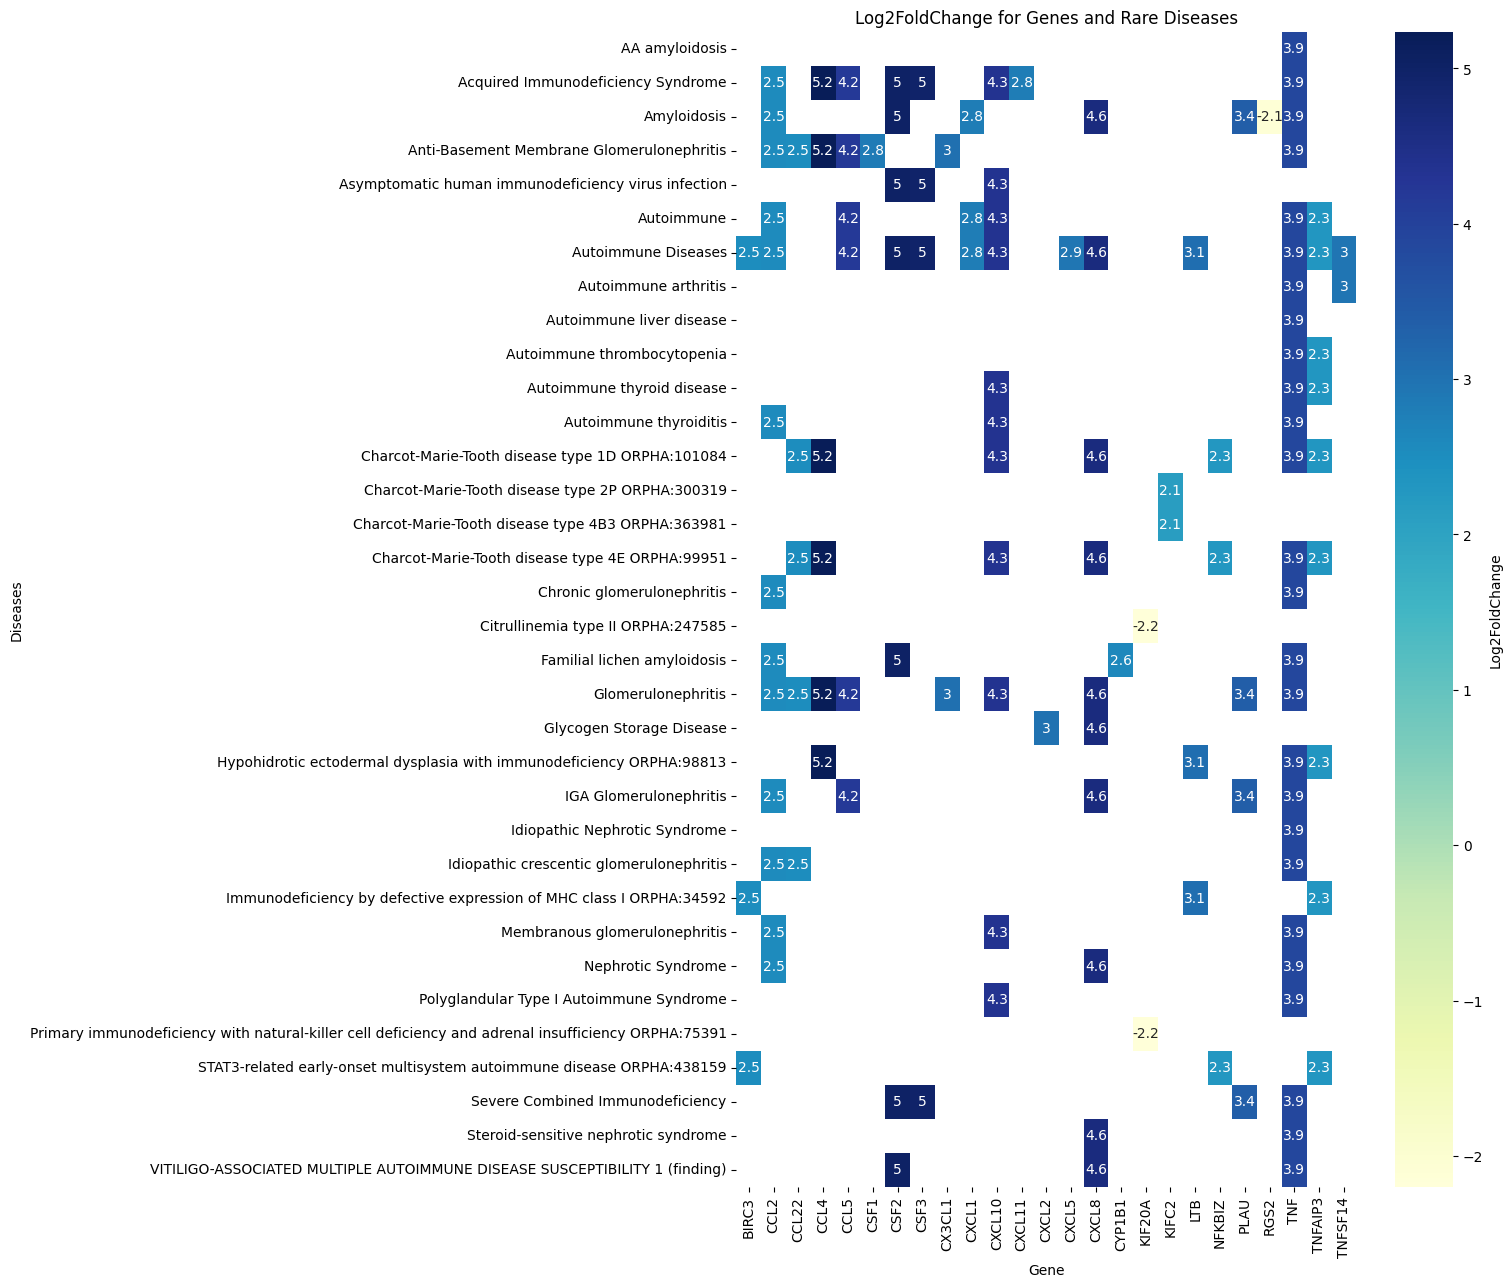

In [6]:
# Create Heatmap
# Pivot the dataframe to have genes as rows and diseases as columns
heatmap_data = data.pivot_table(index="Rare Disease", columns="Gene", values="Log2FoldChange", aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Log2FoldChange'})
plt.title('Log2FoldChange for Genes and Rare Diseases')
plt.xlabel('Gene')
plt.ylabel('Diseases')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

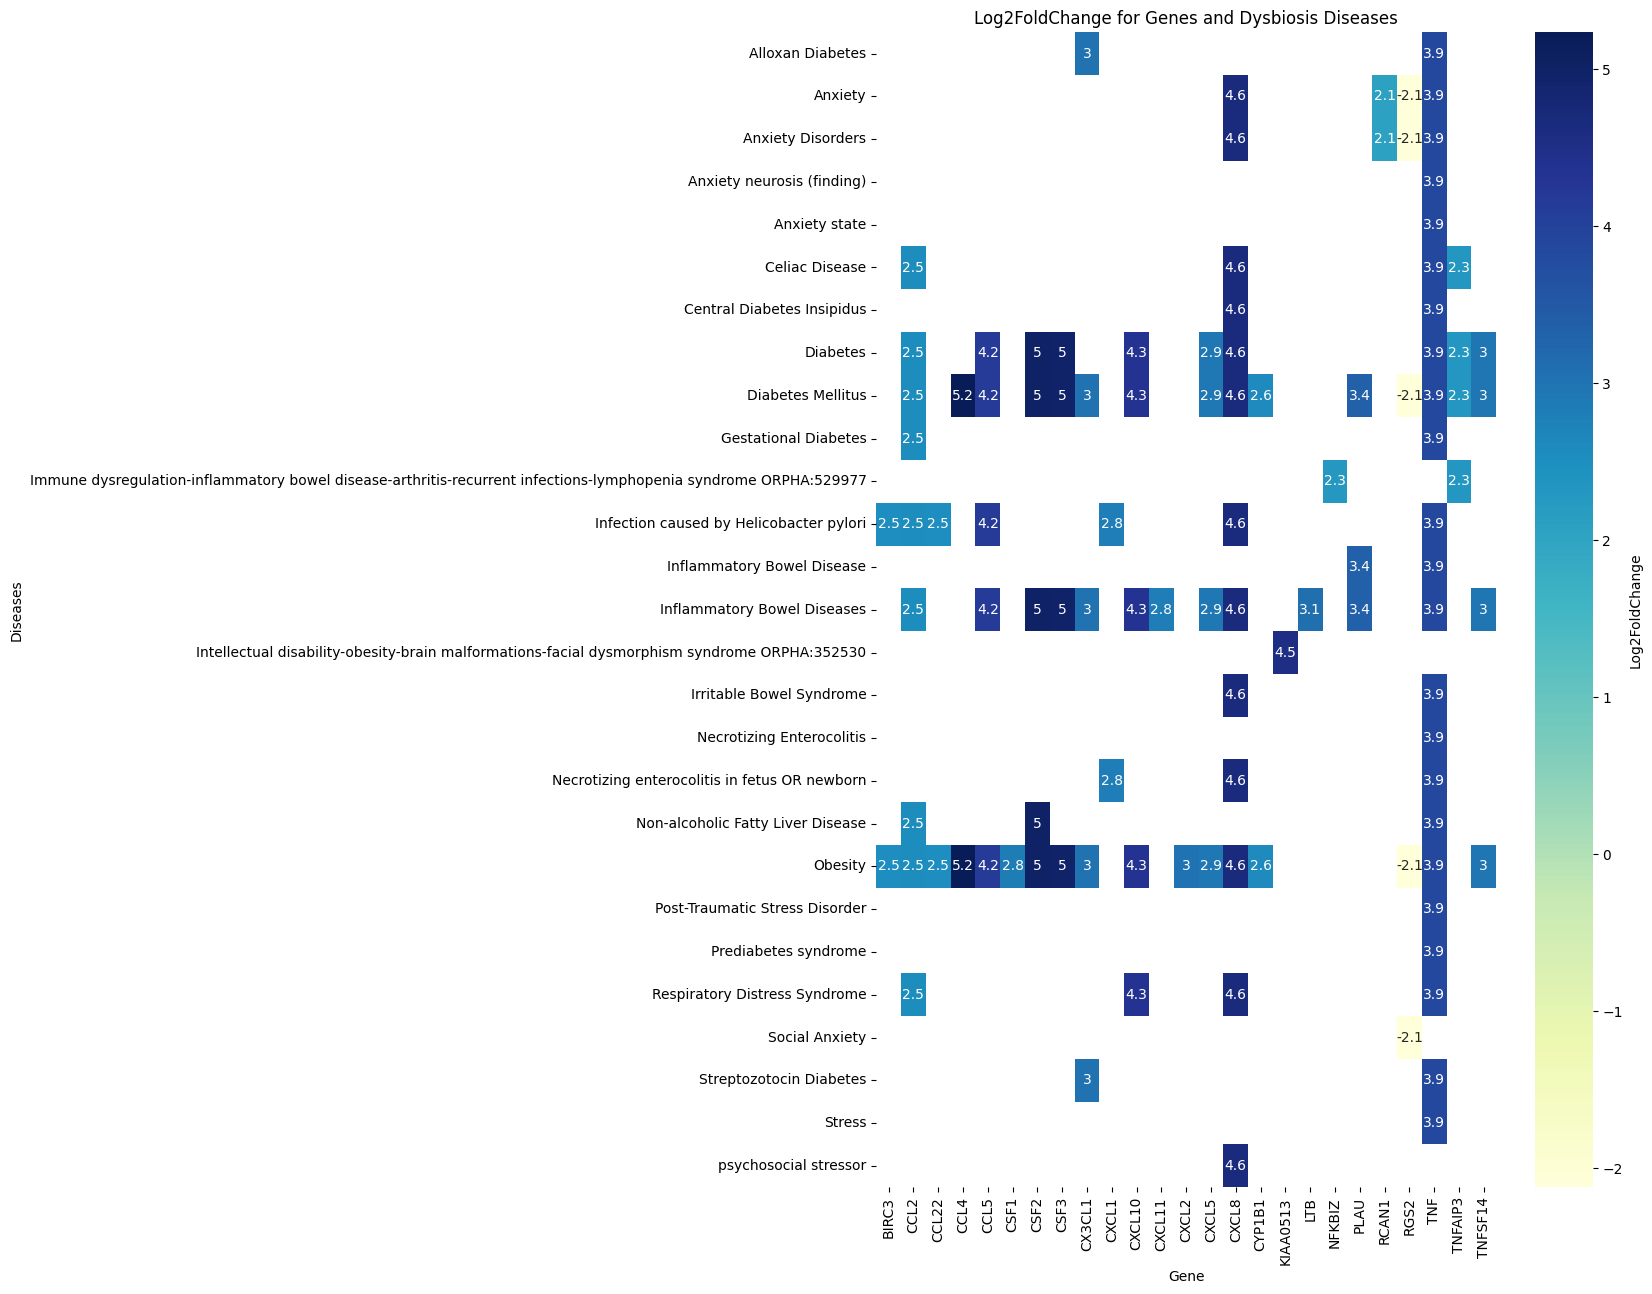

In [7]:
# Create Heatmap
# Pivot the dataframe to have genes as rows and diseases as columns
heatmap_data = data.pivot_table(index="dysbiosis Disease", columns="Gene", values="Log2FoldChange", aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Log2FoldChange'})
plt.title('Log2FoldChange for Genes and Dysbiosis Diseases')
plt.xlabel('Gene')
plt.ylabel('Diseases')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

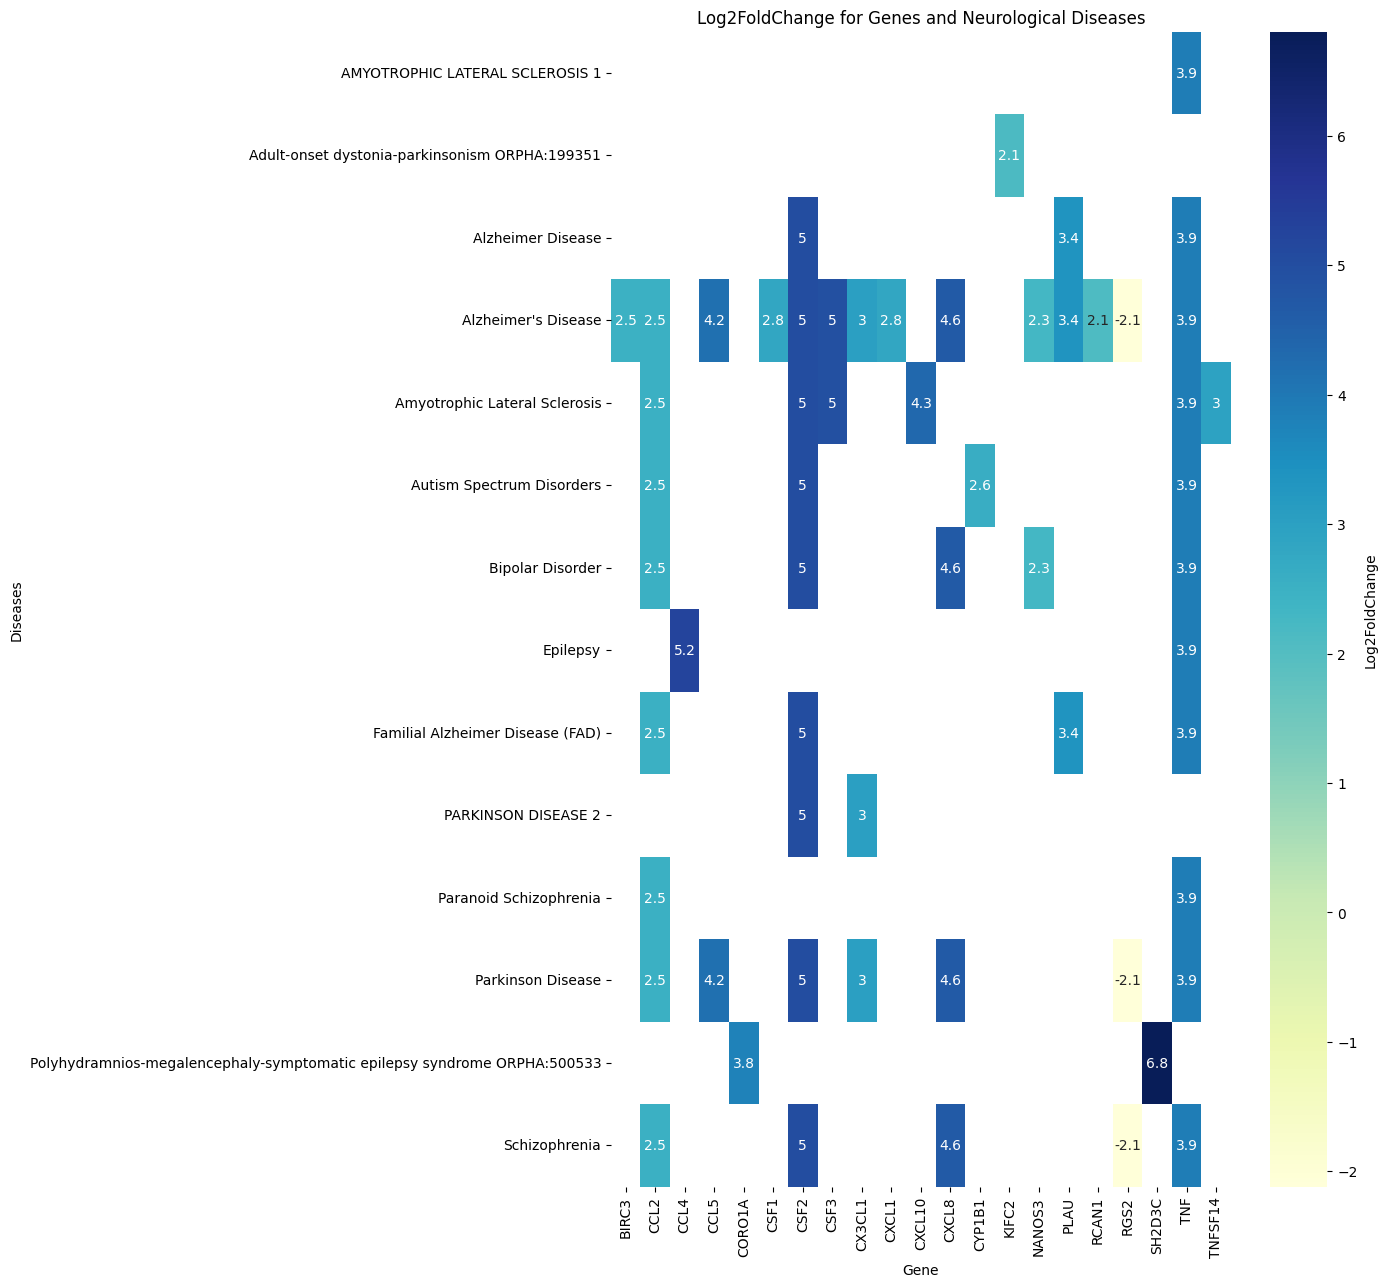

In [8]:
# Create Heatmap
# Pivot the dataframe to have genes as rows and diseases as columns
heatmap_data = data.pivot_table(index="Neurological Disease", columns="Gene", values="Log2FoldChange", aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Log2FoldChange'})
plt.title('Log2FoldChange for Genes and Neurological Diseases')
plt.xlabel('Gene')
plt.ylabel('Diseases')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()